In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nest-competition/eligibilities.txt
/kaggle/input/nest-competition/reported_events.txt
/kaggle/input/nest-competition/facilities.txt
/kaggle/input/nest-competition/usecase_2_.csv
/kaggle/input/nest-competition/drop_withdrawals.txt


In [3]:
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/nest-competition/usecase_2_.csv')
df = df.rename(columns={"NCT Number": "nct_id"})

In [5]:
drop_withdrawals = pd.read_csv('/kaggle/input/nest-competition/drop_withdrawals.txt', sep='|')
drop_withdrawals.head()

,id,nct_id,result_group_id,ctgov_group_code,period,reason,count,drop_withdraw_comment,reason_comment,count_units
0,5991139,NCT00827372,9120733,FG000,Overall Study,Adverse Event,5,NaN,NaN,NaN
1,5991140,NCT00827372,9120733,FG000,Overall Study,Lack of Efficacy,3,NaN,NaN,NaN
2,5991141,NCT01982760,9120734,FG000,Overall Study,Physician Decision,1,NaN,NaN,NaN
3,5991142,NCT01982760,9120735,FG001,Overall Study,Physician Decision,0,NaN,NaN,NaN
4,5991143,NCT01056276,9120736,FG000,Treatment Period-Cycles 1-8,Toxicity,2,NaN,NaN,NaN


In [27]:
# drop_withdrawals.head(40)

In [7]:
drop_withdrawals.shape

(487399, 10)

In [8]:
# Perform an inner merge to keep only the rows in drop_withdrawals where nct_id is in df
drop_withdrawals = drop_withdrawals.merge(df[['nct_id']], on='nct_id', how='inner')

# Check the shape of the filtered DataFrame
print(drop_withdrawals.shape)

(103728, 10)


In [9]:
drop_withdrawals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103728 entries, 0 to 103727
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     103728 non-null  int64  
 1   nct_id                 103728 non-null  object 
 2   result_group_id        103728 non-null  int64  
 3   ctgov_group_code       103728 non-null  object 
 4   period                 103728 non-null  object 
 5   reason                 103728 non-null  object 
 6   count                  103728 non-null  int64  
 7   drop_withdraw_comment  0 non-null       float64
 8   reason_comment         0 non-null       float64
 9   count_units            0 non-null       float64
dtypes: float64(3), int64(3), object(4)
memory usage: 7.9+ MB


In [10]:
drop_withdrawals = drop_withdrawals.drop(['id', 'drop_withdraw_comment', 'reason_comment', 'count_units'], axis='columns')
drop_withdrawals.shape

(103728, 6)

In [11]:
drop_withdrawals.drop_duplicates(keep="first", inplace=True)
drop_withdrawals.shape

(103716, 6)

In [31]:
drop_withdrawals['nct_id'].nunique()

7870

In [12]:
drop_withdrawals['ctgov_group_code'].unique()

array(['FG000', 'FG001', 'FG002', 'FG003', 'FG004', 'FG005', 'FG006',
       'FG007', 'FG008', 'FG009', 'FG010', 'FG011', 'FG012', 'FG013',
       'FG014', 'FG015', 'FG016', 'FG017', 'FG018', 'FG019', 'FG020',
       'FG021', 'FG022', 'FG023', 'FG024', 'FG025', 'FG026', 'FG027',
       'FG028', 'FG029', 'FG030', 'FG031', 'FG032', 'FG033', 'FG034',
       'FG035', 'FG036', 'FG037', 'FG038', 'FG039'], dtype=object)

In [13]:
len(drop_withdrawals['period'].unique())

2353

In [14]:
len(drop_withdrawals['result_group_id'].unique())

22339

In [15]:
len(drop_withdrawals['reason'].unique())

5841

In [16]:
drop_withdrawals['count'].unique()

array([    0,     1,     3,     4,     2,     5,     8,    16,     9,
          19,     6,    24,    30,    21,    20,    15,    18,     7,
          11,    13,    12,    87,    63,    46,    38,    10,    14,
          76,    71,    44,    28,    17,    26,    31,   257,    23,
          72,   465,    32,    25,   162,    56,   102,    74,    70,
         105,    57,    35,    39,   255,   250,    36,    47,    41,
          73,    59,    27,    95,    51,    40,    81,    43,    64,
          22,    60,    68,   124,    92,   343,   337,    52,   392,
         106,    94,    50,    65,    66,    37,    90,    48,   158,
         603,    33,    29,   172,   113,    82,   146,   129,    34,
          45,   100,   131,   103,    80,  1869,  1819,  1743,  1821,
          49,   155,   170,    53,    58,   108,   112,    78,  5066,
        5080, 13967, 13757,   478,   450,   233,   171,   185,   200,
         205,   128,   995,    54,    55,   151,   160,    42,   189,
         143,   187,

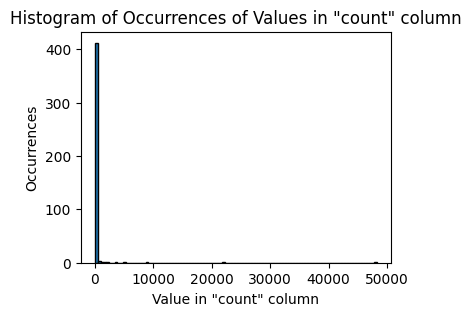

In [17]:
# Get the value counts of the 'count' column
value_counts = drop_withdrawals['count'].value_counts()

# Plotting the histogram
plt.figure(figsize=(4,3))
plt.hist(value_counts, bins=100, edgecolor='black')  # Adjust bins as needed
plt.title('Histogram of Occurrences of Values in "count" column')
plt.xlabel('Value in "count" column')
plt.ylabel('Occurrences')
plt.show()

In [18]:
drop_withdrawals.head(40)

,nct_id,result_group_id,ctgov_group_code,period,reason,count
0,NCT03733899,9120750,FG000,Period 1,Protocol Violation,0
1,NCT03733899,9120751,FG001,Period 1,Protocol Violation,0
2,NCT03733899,9120752,FG002,Period 1,Protocol Violation,0
3,NCT03733899,9120753,FG003,Period 1,Protocol Violation,0
4,NCT03733899,9120754,FG004,Period 1,Protocol Violation,0
5,NCT03733899,9120755,FG005,Period 1,Protocol Violation,1
6,NCT03733899,9120750,FG000,Period 2,Unscuccessful Treatment,0
7,NCT03733899,9120751,FG001,Period 2,Unscuccessful Treatment,1
8,NCT03733899,9120752,FG002,Period 2,Unscuccessful Treatment,0
9,NCT03733899,9120753,FG003,Period 2,Unscuccessful Treatment,0


In [19]:
# Group by 'nct_id' and 'result_group_id' and check the unique values in 'ctgov_group_code'
anomalies = drop_withdrawals.groupby(['nct_id', 'result_group_id'])['ctgov_group_code'].nunique()

# Filter out the groups where the number of unique 'ctgov_group_code' is greater than 1 (indicating an anomaly)
anomalies = anomalies[anomalies > 1]

# Display the anomalies
anomalies

Series([], Name: ctgov_group_code, dtype: int64)

THIS MEANS WE CAN REMOVE result_group_id AS THE INFO IS CONVEYED IN ctgov_group_code

In [20]:
drop_withdrawals = drop_withdrawals.drop(['result_group_id'], axis='columns')

In [21]:
drop_withdrawals.shape

(103716, 5)

In [22]:
drop_withdrawals.head(30)

,nct_id,ctgov_group_code,period,reason,count
0,NCT03733899,FG000,Period 1,Protocol Violation,0
1,NCT03733899,FG001,Period 1,Protocol Violation,0
2,NCT03733899,FG002,Period 1,Protocol Violation,0
3,NCT03733899,FG003,Period 1,Protocol Violation,0
4,NCT03733899,FG004,Period 1,Protocol Violation,0
5,NCT03733899,FG005,Period 1,Protocol Violation,1
6,NCT03733899,FG000,Period 2,Unscuccessful Treatment,0
7,NCT03733899,FG001,Period 2,Unscuccessful Treatment,1
8,NCT03733899,FG002,Period 2,Unscuccessful Treatment,0
9,NCT03733899,FG003,Period 2,Unscuccessful Treatment,0


In [23]:
# drop_withdrawals.to_excel('drop_withdrawals_refined1.xlsx', index=False)

In [24]:
# Step 1: Group and summarize for each `nct_id`
drop_withdrawals_cleaned = drop_withdrawals.groupby('nct_id').agg(
    total_dropouts=('count', 'sum'),        # Total dropouts
    unique_reasons=('reason', 'nunique'),   # Number of unique reasons
    unique_periods=('period', 'nunique')    # Number of unique periods
).reset_index()

# Step 2: Create nested dictionaries for reasons and periods per `nct_id`
reason_dict = drop_withdrawals.groupby('nct_id').apply(
    lambda x: x.groupby('reason')['count'].sum().to_dict()
)
period_dict = drop_withdrawals.groupby('nct_id').apply(
    lambda x: x.groupby('period')['count'].sum().to_dict()
)

# Step 3: Merge everything together
drop_withdrawals_cleaned['reason_counts'] = reason_dict.values
drop_withdrawals_cleaned['period_counts'] = period_dict.values

# Final Output: Each nct_id is now one row
drop_withdrawals_cleaned.head()

/tmp/ipykernel_24/661614968.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reason_dict = drop_withdrawals.groupby('nct_id').apply(
/tmp/ipykernel_24/661614968.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  period_dict = drop_withdrawals.groupby('nct_id').apply(


,nct_id,total_dropouts,unique_reasons,unique_periods,reason_counts,period_counts
0,NCT01376167,20,3,1,"{'Lost to Follow-up': 8, 'Physician Decision':...",{'Overall Study': 20}
1,NCT01410890,1,1,1,{'Withdrawal by Subject': 1},{'Overall Study': 1}
2,NCT01420627,1,1,1,{'Adverse Event': 1},{'EZN-2279 Treatment Period': 1}
3,NCT01494038,171,6,1,"{'Death': 6, 'Lost to Follow-up': 38, 'Not abl...",{'Overall Study': 171}
4,NCT01590017,4,4,1,"{'Adverse Event': 1, 'Lack of Efficacy': 1, 'P...",{'Overall Study': 4}


In [25]:
# Save the DataFrame as a CSV file
drop_withdrawals_cleaned.to_csv('drop_withdrawals_cleaned.csv', index=False)

# Kaggle specific: Generate a download link
from IPython.display import FileLink
FileLink('drop_withdrawals_cleaned.csv')

/kaggle/working/drop_withdrawals_cleaned.csv

In [26]:
drop_withdrawals_cleaned.shape

(7870, 6)